In [1459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('df.csv')

In [1460]:
df.總確診.fillna(0, inplace=True)
df.每日確診.fillna(0, inplace=True)
df['cov期間'] = df.總確診 / df.總確診
df.cov期間.fillna(0, inplcae=True)
df.日經.fillna(method='bfill', inplace=True)
df

,Unnamed: 0,FB_VIX,S&P 500,原油,美元,道瓊,那斯達克,恒生,上證,日經,總確診,每日確診,cov期間
0,2017-01-03,20.04,2257.83,52.33,32.264,19881.76,5429.08,22150.40,3135.92,19594.16,0.0,0.0,NaN
1,2017-01-04,18.92,2270.75,53.26,32.227,19942.16,5477.00,22134.47,3158.79,19594.16,0.0,0.0,NaN
2,2017-01-05,18.07,2269.00,53.76,32.229,19899.29,5487.94,22456.69,3165.41,19520.69,0.0,0.0,NaN
3,2017-01-06,17.84,2276.98,53.99,31.943,19963.80,5521.06,22503.01,3154.32,19454.33,0.0,0.0,NaN
4,2017-01-09,17.69,2268.90,51.96,32.041,19887.38,5531.82,22558.69,3171.24,19454.33,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2020-05-13,6.53,2820.00,25.57,29.788,23247.97,8863.17,24180.30,2898.05,20267.05,4223701.0,85786.0,1.0
965,2020-05-14,7.17,2852.50,27.73,29.892,23625.34,8943.72,23829.74,2870.34,19914.78,4309652.0,85951.0,1.0
966,2020-05-15,6.83,2863.70,29.65,29.876,23685.42,9014.56,23797.47,2868.46,20037.47,4406317.0,96665.0,1.0
967,2020-05-18,6.52,2953.91,33.23,29.954,24597.37,9234.83,23934.77,2875.42,20133.73,4679764.0,81218.0,1.0


In [1433]:
temp = df[:876]
temp.index = range(1,len(temp)+1)
temp_map = []
for i in temp.columns:
    temp_map.append(i + '_2')
temp.columns = temp_map
df = df.join(temp)
df.dropna(inplace=True)

In [1434]:
# df = df[100:]

In [1435]:
X = df[['S&P 500', '原油','美元','道瓊','那斯達克', '恒生', '上證', '日經']][:len(df)-30]
# X = df[['S&P 500', '原油','美元','道瓊']][:len(df)-30]
y = df['FB_VIX'][:len(df)-30]
valid_X = df[['S&P 500', '原油','美元','道瓊','那斯達克', '恒生', '上證', '日經']][len(df)-30:]
# valid_X = df[['S&P 500', '原油','美元','道瓊']][len(df)-30:]
valid_y = df['FB_VIX'][len(df)-30:]

# X['S&P 500_變動率'] = (df['S&P 500'] - df['S&P 500_2']) / df['S&P 500_2']
# X['原油_變動率'] = (df.原油 - df.原油_2) / df.原油_2
# X['美元_變動率'] = (df.美元 - df.美元_2) / df.美元_2
# X['道瓊_變動率'] = (df.道瓊 - df.道瓊_2) / df.道瓊_2
# X['那斯達克_變動率'] = (df.那斯達克 - df.那斯達克_2) / df.那斯達克_2
X



,S&P 500,原油,美元,道瓊,那斯達克,恒生,上證,日經


In [1436]:
corrdf = X.join(y).corr()
corrdf

,S&P 500,原油,美元,道瓊,那斯達克,恒生,上證,日經,FB_VIX
S&P 500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
原油,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
美元,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
道瓊,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
那斯達克,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
恒生,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
上證,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
日經,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FB_VIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


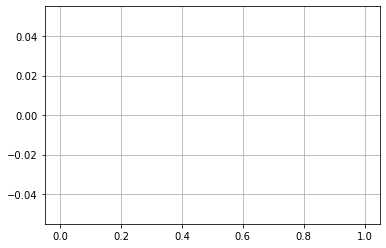

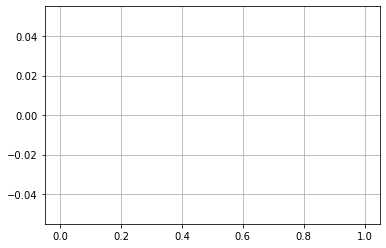

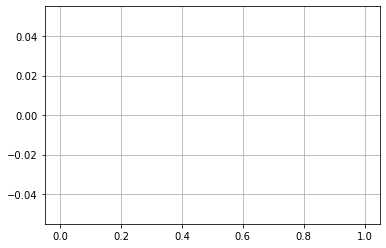

None


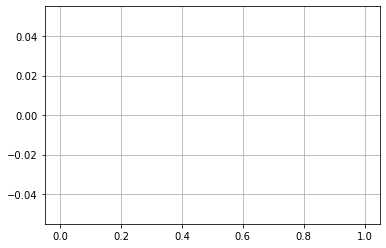

None


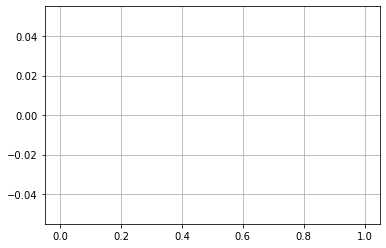

None


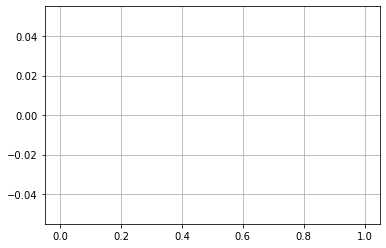

None


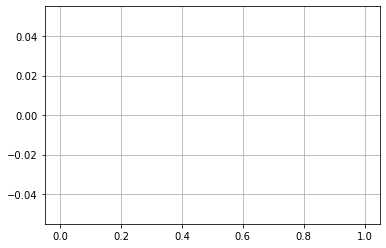

None


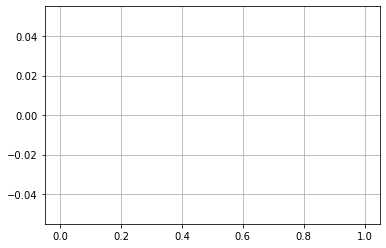

None


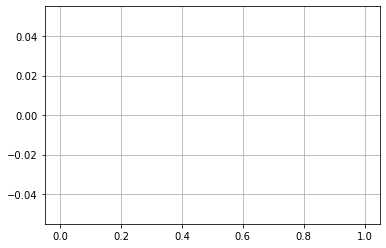

None


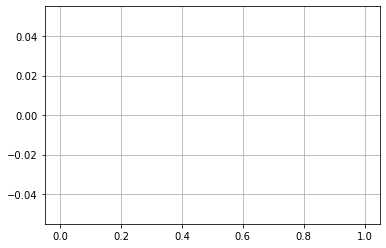

None


In [1437]:
y.hist(bins = 30)
plt.show()

y = np.log(y)
y.hist(bins = 30)
plt.show()

for i in X.columns:
    X[i].hist(bins = 30)
    print(plt.show())

In [1438]:
X

,S&P 500,原油,美元,道瓊,那斯達克,恒生,上證,日經


In [1439]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# X_train, X_test, y_train, y_test = X[:683], X[683:], y[:683], y[683:]

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [1440]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1441]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

ValueError: Found array with 0 sample(s) (shape=(0, 8)) while a minimum of 1 is required by StandardScaler.

In [1442]:
# lr = make_pipeline(StandardScaler(), LinearRegression())
# lasso = make_pipeline(StandardScaler(), Lasso())
# ridge = make_pipeline(StandardScaler(), Ridge())
# elnet = make_pipeline(StandardScaler(), ElasticNet())
# svr = make_pipeline(StandardScaler(), LinearSVR())
# sgd = make_pipeline(StandardScaler(), SGDRegressor())

In [1443]:


models = [LinearRegression(), Lasso(), Ridge(), ElasticNet(), LinearSVR(), SGDRegressor()]

CV = 2
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  scores = cross_val_score(model, X_std, y, scoring='neg_mean_squared_error', cv=CV)
  for fold_idx, neg_mean_squared_error in enumerate(scores):
    entries.append((model_name, fold_idx, neg_mean_squared_error))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'neg_mean_squared_error'])
import seaborn as sns
sns.boxplot(x='model_name', y='neg_mean_squared_error', data=cv_df)
sns.stripplot(x='model_name', y='neg_mean_squared_error', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [783, 0]

In [1444]:
cv_df.groupby('model_name').mean()

KeyError: 'model_name'

In [1445]:
alpha = np.logspace(-3, 3, 7)
fit_intercept = [True, False]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
ridge_param_grid = {'alpha':alpha, 'fit_intercept':fit_intercept,'solver':solver}
ridge_gs = GridSearchCV(Ridge(), param_grid=ridge_param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)

epsilon = np.logspace(-3, 3, 7)
loss = ['epsilon_insensitive', 'squared_epsilon_insensitive']
fit_intercept = [True, False]
C = np.logspace(-3, 3, 7)
svm_param_grid = {'epsilon':epsilon, 'fit_intercept':fit_intercept,'loss':loss, 'C':C}
svm_gs = GridSearchCV(LinearSVR(), param_grid=svm_param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)

param_grid_SGD = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    }
SGD = GridSearchCV(SGDRegressor(), param_grid_SGD, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)

In [1446]:
model = ridge_gs
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.006, test: 0.008
R^2 train: 0.952, test: 0.928


In [1447]:
y_test_pred = np.exp(y_test_pred)
y_temp =  y_test[:]
y_temp = np.exp(y_test)
y_temp.index = [i for i in range(len(y_temp))]
y_temp = pd.concat([pd.DataFrame(y_test_pred),y_temp],axis=1)
y_temp.columns = ['pred', 'FB_VIX']
y_temp['error'] = y_temp.pred - y_temp.FB_VIX
y_temp.error.mean()

-0.010639898221396287

In [1448]:
model.fit(X, y)
res = model.predict(valid_X)
res = np.exp(res)
res = pd.DataFrame(res)
valid_y.index = [i for i in range(len(valid_y))]
res = pd.concat([res, valid_y], axis=1)
res.columns = ['pred', 'FB_VIX']
res['error'] = res.pred - res.FB_VIX
res

ValueError: Cannot have number of splits n_splits=2 greater than the number of samples: n_samples=0.